In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
#read data as sentence and 1/0 value
X=pd.read_csv("C:\data.txt", delimiter="\t", names=['sentence', 'is_1_or_0'])

In [396]:
X

,sentence,is_1_or_0
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [398]:
X.dtypes

sentence       object
is_1_or_0    category
dtype: object

In [399]:
len(X)

2748

In [400]:
X.sentence

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2743    I think food should have flavor and texture an...
2744                             Appetite instantly gone.
2745    Overall I was not impressed and would not go b...
2746    The whole experience was underwhelming, and I ...
2747    Then, as if I hadn't wasted enough of my life ...
Name: sentence, Length: 2748, dtype: object

In [401]:
#add some columns
X['category'] = "something"

In [402]:
X

,sentence,is_1_or_0,category
0,So there is no way for me to plug it in here i...,0,something
1,"Good case, Excellent value.",1,something
2,Great for the jawbone.,1,something
3,Tied to charger for conversations lasting more...,0,something
4,The mic is great.,1,something
...,...,...,...
2743,I think food should have flavor and texture an...,0,something
2744,Appetite instantly gone.,0,something
2745,Overall I was not impressed and would not go b...,0,something
2746,"The whole experience was underwhelming, and I ...",0,something


In [403]:
#drop the useless columns
X=X.drop('category', axis=1)

In [404]:
X

,sentence,is_1_or_0
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [405]:
#see 0-9 row of sentence
X[0:10]['sentence']

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [406]:
X[-10:]

,sentence,is_1_or_0
2738,The refried beans that came with my meal were ...,0
2739,Spend your money and time some place else.,0
2740,A lady at the table next to us found a live gr...,0
2741,the presentation of the food was awful.,0
2742,I can't tell you how disappointed I was.,0
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0
2747,"Then, as if I hadn't wasted enough of my life ...",0


In [407]:
X.iloc[::10, 0:1][0:10]

,sentence
0,So there is no way for me to plug it in here i...
10,And the sound quality is great.
20,I went on Motorola's website and followed all ...
30,"This is a simple little phone to use, but the ..."
40,"It has a great camera thats 2MP, and the pics ..."
50,Not loud enough and doesn't turn on like it sh...
60,Essentially you can forget Microsoft's tech su...
70,Mic Doesn't work.
80,I wear it everyday and it holds up very well.
90,For a product that costs as much as this one d...


In [408]:
X.loc[::10, 'sentence'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [409]:
X[::10][0:10]

,sentence,is_1_or_0
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [410]:
#find if there are some missing data
X.isnull()

,sentence,is_1_or_0
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [411]:
#counting the missing data
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,is_1_or_0
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [412]:
#add some data that don't have value, so use isnull(), there would bo some missing data
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [413]:
dummy_series

text        dummy_record
category               1
dtype: object

In [414]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [415]:
len(result_with_series)

2749

In [416]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,is_1_or_0,category,text
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,1,1,2748,2748


In [417]:
X.dropna(inplace=True)

In [418]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,is_1_or_0
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [419]:
len(X)

2748

In [420]:
#fing if there are same data
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [421]:
sum(X.duplicated())

17

In [422]:
#drop same datas and keep only one
X.drop_duplicates(keep="first", inplace=True)

In [423]:
len(X)

2731

In [424]:
import matplotlib.pyplot as plt
%matplotlib inline

In [425]:
X.columns

Index(['sentence', 'is_1_or_0'], dtype='object')

In [426]:
import nltk

In [427]:
#seperate sentence in some character
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [428]:
X[0:5]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [429]:
X[0:5]

,sentence,is_1_or_0,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [430]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [431]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [432]:
analyze = count_vect.build_analyzer()

In [433]:
analyze(" ".join(list(X[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [434]:
X_counts.shape

(2731, 5155)

In [435]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [436]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [437]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [438]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [439]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [440]:
plot_z = X_counts[0:20, 0:20].toarray()

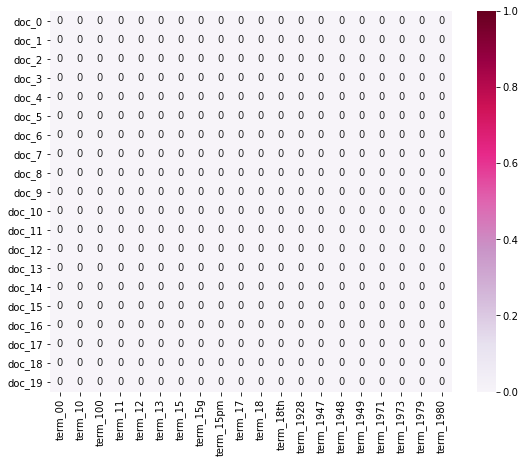

In [441]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [442]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [443]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [444]:
term_frequencies[0]

1

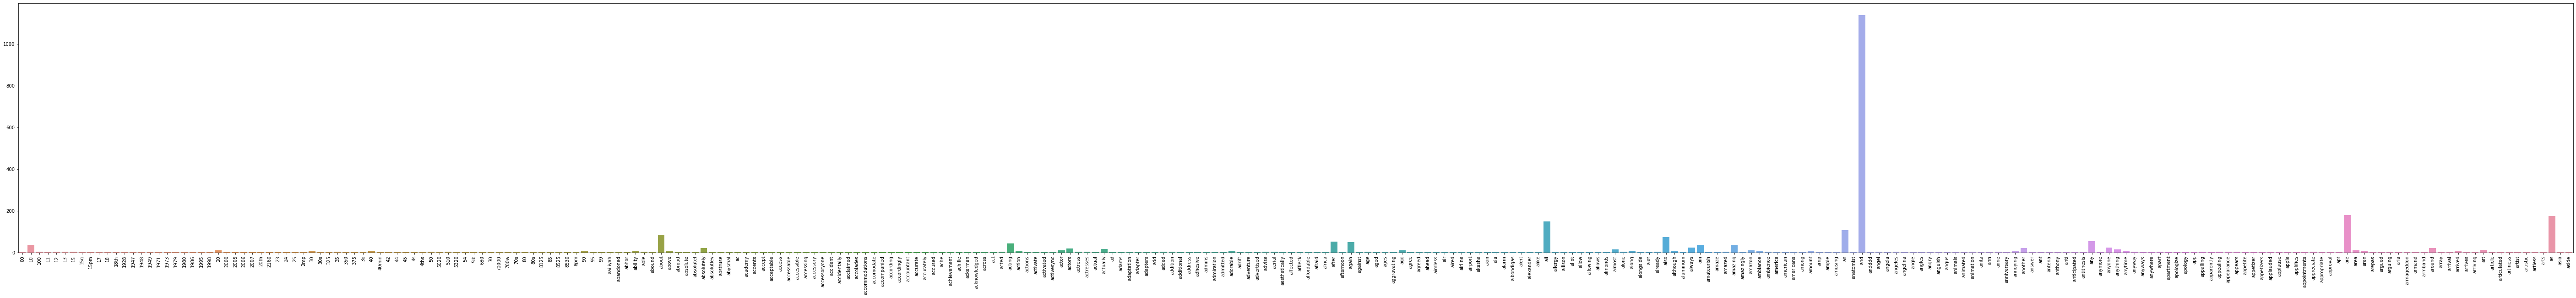

In [445]:
#see how many occurance of all caracter 
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [446]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

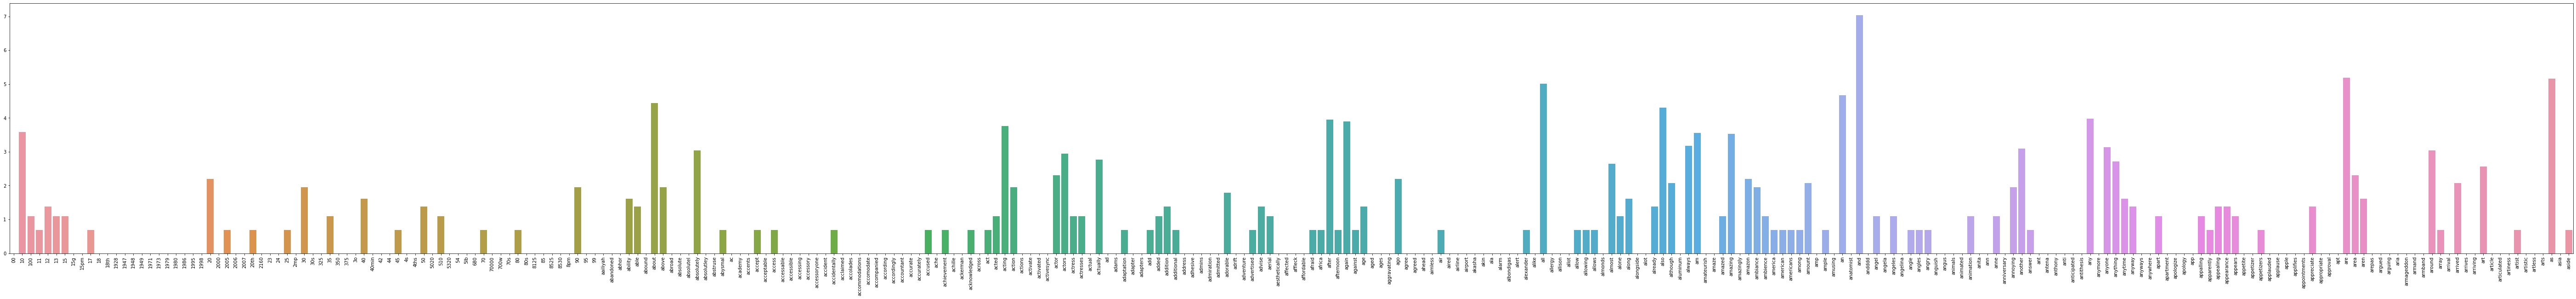

In [447]:
#change into a more visualize way
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [448]:
X=X.drop('unigrams', axis=1)

In [449]:
X

,sentence,is_1_or_0
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [450]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [451]:
mlb = preprocessing.LabelBinarizer()

In [452]:
#change is_1_or_0 in another 
mlb.fit(X.is_1_or_0)

LabelBinarizer()

In [453]:
mlb.classes_

array([0, 1], dtype=int64)

In [454]:
X['bin_category'] = mlb.transform(X['is_1_or_0']).tolist()

In [455]:
X[0:9]

,sentence,is_1_or_0,bin_category
0,So there is no way for me to plug it in here i...,0,[0]
1,"Good case, Excellent value.",1,[1]
2,Great for the jawbone.,1,[1]
3,Tied to charger for conversations lasting more...,0,[0]
4,The mic is great.,1,[1]
5,I have to jiggle the plug to get it to line up...,0,[0]
6,If you have several dozen or several hundred c...,0,[0]
7,If you are Razr owner...you must have this!,1,[1]
8,"Needless to say, I wasted my money.",0,[0]


In [459]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

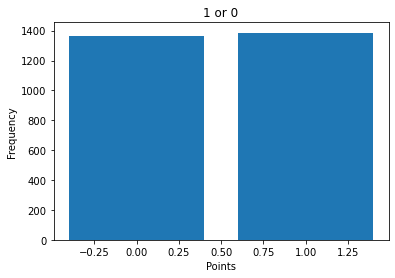

In [462]:
#find histagram by plt
fig, ax = plt.subplots() 
data = X['is_1_or_0'].value_counts() 

points = data.index 
frequency = data.values 
ax.bar(points, frequency) 

ax.set_title('1 or 0') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

<AxesSubplot:ylabel='Frequency'>

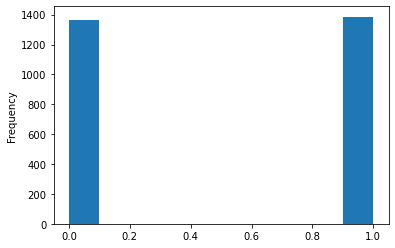

In [463]:
#find histagram by pandas
X['is_1_or_0'].plot.hist()

In [464]:
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

[Text(0, 0, 'is_1_or_0')]

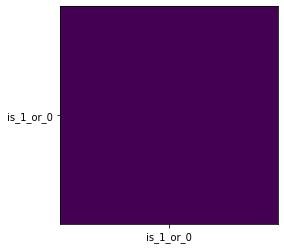

In [469]:
#correlatuin didn't make sence
corr = X.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
